# Modules

In [3]:
import matplotlib.pyplot 
from matplotlib.pyplot import *
import numpy as np
from scipy.optimize import linprog
import math

# settings
np.set_printoptions(suppress=True, linewidth=100)

from pulp import LpVariable, LpProblem, LpMaximize, LpStatus, value, LpMinimize

### Week 3 Discussion Problem

In [73]:
total_returnMGK = 1+0.0697+0.0114
print(total_returnMGK)
total_returnBLV = 1+0.0313+0.0318
print(total_returnBLV)

# step 1: find intersection
coefficients1 = np.matrix([[0.0697, 0.0313],
                          [0.0114, 0.0318]])
constants1 = np.array([500, 200])
intersection1 = np.linalg.solve(coefficients1,constants1)

coefficients2 = np.matrix([[0.0697, 0.0313],
                           [1,1]])

constants2 = np.array([500, 10000])
intersection2 = np.linalg.solve(coefficients2,constants2)

coefficients3 = np.matrix([[0.0114, 0.0318],
                           [1,1]])
constants3 = np.array([200, 10000])
intersection3 = np.linalg.solve(coefficients3,constants3)

# step 2: find intersection
z1Intersection = intersection1[0] + intersection1[1]
total_return1 = (total_returnMGK*intersection1[0] + total_returnBLV*intersection1[1]) - z1Intersection
print(f'Constraints 1 & 2 intersect at coordinates: {intersection1}\nCorner Point: {z1Intersection}.')
print(f'Total Return: {total_return1}')

z2Intersection = intersection2[0] + intersection2[1]
total_return2 = (total_returnMGK*intersection2[0] + total_returnBLV*intersection2[1]) - z2Intersection
print(f'\nConstraints 1 & 3 intersect at coordinates: {intersection2}\nCorner Point: {z2Intersection}.')
print(f'Total Return: {total_return2}')

z3Intersection = intersection3[0] + intersection3[1]
total_return3 = (total_returnMGK*intersection3[0] + total_returnBLV*intersection3[1]) - z3Intersection
MGK_return3 = total_returnMGK*intersection3[0] - intersection3[0]
BLV_return3 = total_returnBLV*intersection3[1] - intersection3[1]
print(f'\nConstraints 2 & 3 intersect at coordinates: {intersection3}\nCorner Point: {z3Intersection}.')
print(f'Total Return: {total_return3}')

print(f'Maximum Z: {total_returnMGK*intersection3[0] + total_returnBLV*intersection3[1]}')
print(f'MGK Return: {MGK_return3}')
print(total_returnMGK*intersection3[0])
print(f'BLV Return: {BLV_return3}')
print(total_returnBLV*intersection3[1])


1.0811000000000002
1.0631000000000002
Constraints 1 & 2 intersect at coordinates: [5183.79901486 4430.96513304]
Corner Point: 9614.764147899594.
Total Return: 700.0000000000018

Constraints 1 & 3 intersect at coordinates: [4869.79166667 5130.20833333]
Corner Point: 10000.0.
Total Return: 718.6562500000018

Constraints 2 & 3 intersect at coordinates: [5784.31372549 4215.68627451]
Corner Point: 10000.0.
Total Return: 735.1176470588252
Maximum Z: 10735.117647058825
MGK Return: 469.10784313725617
6253.421568627453
BLV Return: 266.0098039215691
4481.696078431372


In [105]:
# step 3: arrange arrays 
x=arange(0,6000,1)
y0=arange(0,6000,1)
y1= (500/0.0313) - ((0.0697*x)/0.0313)
y2= (200/0.0318) - ((0.0114*x)/0.0318)
y3= 10000-x
y = (total_return3/(total_returnBLV-1)) - (((total_returnMGK-1)*x)/(total_returnBLV-1))

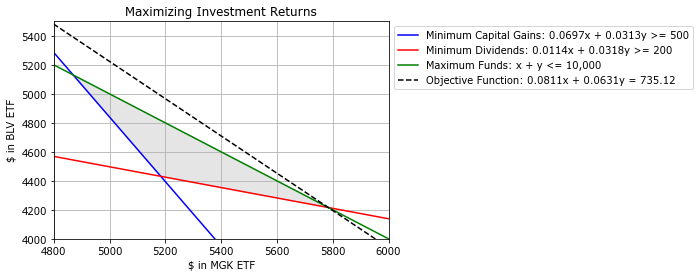

In [106]:
# Step 4: plot the chart
# Plot limits must be set for the graph.
xlim(4800,6000)
ylim(4000,5500)
hlines(1,4000,6000,color='k')
vlines(1,4000,6000,color='k')
grid(True)

xlabel('$ in MGK ETF')
ylabel('$ in BLV ETF')
plot(x,y1 ,'b'  , label='Minimum Capital Gains: 0.0697x + 0.0313y >= 500')
plot(x,y2 ,'r'  , label='Minimum Dividends: 0.0114x + 0.0318y >= 200')
plot(x,y3 ,'g'  , label='Maximum Funds: x + y <= 10,000')  
plot(x,y  ,'k--', label='Objective Function: 0.0811x + 0.0631y = 735.12') # objective function.
legend(bbox_to_anchor=(1, 1))

# Shade regions
x = [intersection1[0], intersection2[0], intersection3[0]]
y = [intersection1[1], intersection2[1], intersection3[1]]
# Matplotlib will fill irregular polygons if the corner points are given.
# Different colors are possible. Alpha controls the level of darkness.
fill(x,y, color='grey', alpha=0.2)
title ('Maximizing Investment Returns') 
show()

### Chapter 4 Notes

##### Chapter 4.4 - Slack Variables and the Pivot

Maximize: 
<br>z = 3*x1 + 2*x2 + x3
<br>Contraints: 
<br>2 * x1 + x2 + x3 <= 150
<br>x1 + 2 * x2 + 8 * x3 <= 200
<br>2 * x1 + 3 * x2 + x3 <= 320
<br>With: 
<br>x1 -- x3 nonnegative 

In [15]:
def print_rows(a,b,c,d):
    temp = np.concatenate((a,b,c,d), axis =0)
    print(temp)

In [59]:
# Long form

# Create Simplex Tableau Matrix 
column_headings = '   x1  x2  x3  s1  s2  s3   z'
R1 = np.array([[2 ,1 ,1 ,1 ,0 ,0 ,0 ,150]])
R2 = np.array([[1 ,2 ,8 ,0 ,1 ,0 ,0 ,200]])
R3 = np.array([[2 ,3 ,1 ,0 ,0 ,1 ,0 ,320]])
# indicators are negative to fulfill: -x1-x2-x3+z=0
R4 = np.array([[-3 ,-2 ,-1 ,0 ,0 ,0 ,1 ,  0]]) 
print("Simplex Tableau:")
print(column_headings)
print_rows(R1,R2,R3,R4)

# Pivot
# column 1 because most negative indicator
# row 1 because 150/2 yields smallest nonnegative real integer in column
R2 = -R1 + 2*R2
R3 = -R1 + R3
R4 = 3*R1 +2*R4
print("\nSimplex Tableau - Pivotted:")
print(column_headings)
print_rows(R1,R2,R3,R4)

# Simplify Pivot
R1 = 0.5*R1
R2 = 0.5*R2
R4 = 0.5*R4
print("\nFinal Simplex Tableau:")
column_headings = '    x1    x2    x3    s1    s2    s3    z'
print(column_headings)
print_rows(R1,R2,R3,R4)

Simplex Tableau:
   x1  x2  x3  s1  s2  s3   z
[[  2   1   1   1   0   0   0 150]
 [  1   2   8   0   1   0   0 200]
 [  2   3   1   0   0   1   0 320]
 [ -3  -2  -1   0   0   0   1   0]]

Simplex Tableau - Pivotted:
   x1  x2  x3  s1  s2  s3   z
[[  2   1   1   1   0   0   0 150]
 [  0   3  15  -1   2   0   0 250]
 [  0   2   0  -1   0   1   0 170]
 [  0  -1   1   3   0   0   2 450]]

Final Simplex Tableau:
    x1    x2    x3    s1    s2    s3    z
[[  1.    0.5   0.5   0.5   0.    0.    0.   75. ]
 [  0.    1.5   7.5  -0.5   1.    0.    0.  125. ]
 [  0.    2.    0.   -1.    0.    1.    0.  170. ]
 [  0.   -0.5   0.5   1.5   0.    0.    1.  225. ]]


Programmatical Approaach

In [37]:
# Maximization Function
z = [-3,-2,-1]
# Coefficients
a = [[2,1,1],[1,2,8],[2,3,1]]
# Constants
b = [150,200,320]

method = 'simplex'

res = linprog(z, A_ub=a, b_ub=b,bounds=(0, None))

print("Status:", res.message, '\n\nMaximum:',
     -1*res.fun,
     "\nOptimial x1:", round(res.x[0]),
     "\nOptimial x2:", round(res.x[1]),
     "\nOptimial x3:", round(res.x[2]))

print( '\nConstraint 1: 2*x1 +   x2 +  x3 <= 150 =',2*math.ceil(res.x[0])+math.ceil(res.x[1])+round(res.x[2])
      ,'\nConstraint 2:   x1 + 2*x2 +8*x3 <= 200 =',math.ceil(res.x[0])+2*math.ceil(res.x[1])+8*round(res.x[2])
      ,'\nConstraint 2: 2*x1 + 3*x2 +  x3 <= 320 =',2*math.ceil(res.x[0])+3*math.ceil(res.x[1])+round(res.x[2]))

Status: Optimization terminated successfully. 

Maximum: 266.6666666032046 
Optimial x1: 33.0 
Optimial x2: 83.0 
Optimial x3: 0.0

Constraint 1: 2*x1 +   x2 +  x3 <= 150 = 152.0 
Constraint 2:   x1 + 2*x2 +8*x3 <= 200 = 202.0 
Constraint 2: 2*x1 + 3*x2 +  x3 <= 320 = 320.0


In [31]:
!pip install pulp

# Pearson Homework

Question 1 

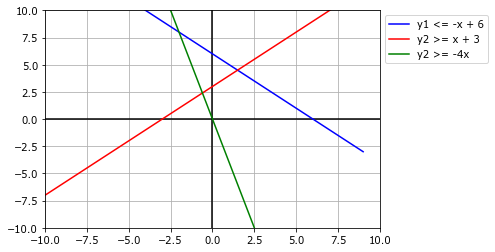

In [18]:
# Bounds:
lb = -10
ub = 10

# step 3: arrange arrays 
x=np.arange(lb,ub,1)
y0=np.arange(lb,ub,1)
y1= 6 - x
y2= 3 + x
y3= -4*x

# step 4: plot the chart
# Plot limits must be set for the graph.
xlim(lb,ub)
ylim(lb,ub)
hlines(0,lb,ub,color='k')
vlines(0,lb,ub,color='k')
grid(True)

plot(x,y1,'b', label ='y1 <= -x + 6')
plot(x,y2,'r', label ='y2 >= x + 3')
plot(x,y3,'g', label ='y2 >= -4x')
# The dashed black line represents the objective function.
legend(bbox_to_anchor=(1, 1))

Question 2

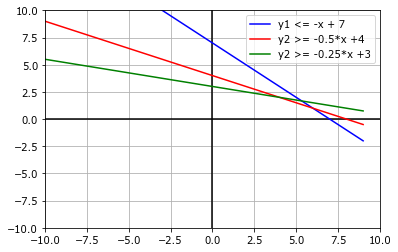

In [24]:
lb = -10
ub = 10

#contraints 
    #x + y  <= 7
    #x + 2y <= 8
    #x + 4y <= 12
# with x & y >= 0 

# plot lines
x=np.arange(lb,ub,1)
y0=np.arange(lb,ub,1)
y1= -x + 7
y2= -0.5*x +4
y3= -0.25*x +3

# step 4: plot the chart
# Plot limits must be set for the graph.
xlim(lb,ub)
ylim(lb,ub)
hlines(0,lb,ub,color='k')
vlines(0,lb,ub,color='k')
grid(True)

plot(x,y1,'b', label ='y1 <= -x + 7')
plot(x,y2,'r', label ='y2 >= -0.5*x +4')
plot(x,y3,'g', label ='y2 >= -0.25*x +3')
# The dashed black line represents the objective function.
legend(bbox_to_anchor=(1, 1))

Question 3 : Maximize given corner points
<br> (a) z=5x+7y
<br> (b) z=x+3y

In [33]:
# Corner Points: 
x = [2,6,5,0]
y = [10,5,1,6]

print('z=5x+7y')
for i in np.arange(0,4):
    z = 5*x[i] + 7*y[i]
    print(f'({x[i]},{y[i]})','-->', z)

print('\nz=x+3y')
for i in np.arange(0,4):
    z = x[i] + 3*y[i]
    print(f'({x[i]},{y[i]})','-->', z)   

z=5x+7y
(2,10) --> 80
(6,5) --> 65
(5,1) --> 32
(0,6) --> 42

z=x+3y
(2,10) --> 32
(6,5) --> 21
(5,1) --> 8
(0,6) --> 18


### Question 4 - Solve Linear programming problem:
<br> Maximize: 
<br> z = 5x + 4y
<br> Subject To: 
<br> 2x + 4y <= 8
<br> 5x + y <= 8
<br> With X & Y >= 0

In [5]:
# Maximization Function
z = [-5,-4]
# Coefficients
a = [[2,4],[5,1]]
# Constants
b = [8,8]

method = 'simplex'

res = linprog(z, A_ub=a, b_ub=b,bounds=(0, None))

print("Solved using linprog:\n", "Status:", res.message, '\nMaximum:',
     -1*res.fun,
     '\n',res.x)

print('\nSolved using linalg method: \n',np.linalg.solve(a,b))

Solved using linprog:
 Status: Optimization terminated successfully. 
Maximum: 11.999999999292802 
 [1.33333333 1.33333333]

Solved using linalg method: 
 [1.33333333 1.33333333]


### Question 5: Minimize costs
             Policy A  Policy B
Fire/Theft         10000     15000
<br>Liability     180000    120000 
<br>Premium           50        40
<br>
<br> Manimize: 
<br> w = 50x + 40y
<br> Subject To: 
<br> 10000x + 15000y >= 450000
<br> 180000x + 120000y >= 5400000
<br> With x & y >= 0

In [6]:
# Maximization Function
w = [-25,-40]
# Coefficients
a = [[10000,15000],
     [180000,120000]]
# Constants
b = [450000,5400000]
#---------------------------------------------------------------------------
# linprog
method = 'simplex'
res = linprog(w, A_ub=a, b_ub=b,bounds=(0, None))
print("Solved using linprog:\n", "Status:", res.message, '\nMinimum:',
     -res.fun,
     '\n',res.x)
#---------------------------------------------------------------------------
# linalg
print('\nSolved using linalg method: \n',np.linalg.solve(a,b))

#--------------------------------------------------------------------------
# Pulp
x1 = LpVariable("x1", 0, None) # x1>=0
x2 = LpVariable("x2", 0, None) # x2>=0

# defines the problem
prob = LpProblem("problem", LpMinimize)

# defines the constraints
prob +=  10000*x1 +  15000*x2 >=  450000
prob += 180000*x1 + 120000*x2 >= 5400000

# defines the objective function to maximize
prob += 25*x1 + 40*x2

# solve the problem
status = prob.solve()
LpStatus[status]

# print the results
print("\nPulp Solution for x1 and x2")
print(value(x1))
print(value(x2))

print('\nPULP WAS THE CORRECT METHOD HERE')

Solved using linprog:
 Status: Optimization terminated successfully. 
Minimum: 1199.9999999367608 
 [ 0.00000003 29.99999998]

Solved using linalg method: 
 [18. 18.]

Pulp Solution for x1 and x2
45.0
0.0

PULP WAS THE CORRECT METHOD HERE


### Question 6: Minimize costs

<br> Minimize: 
<br> w = .30x1 + .60x2
<br> Subject To: 
<br> 120x1 + 30x2 >= 240 vitamin A
<br>   1x1 +  1x2 >=   5 vitamin B
<br>  30x1 + 40x2 >= 180 vitamin C
<br> With x1 & x2 >= 0

In [92]:
# Pulp
x1 = LpVariable("x1", 0, None) # x1>=0
x2 = LpVariable("x2", 0, None) # x2>=0

# defines the problem
prob = LpProblem("problem", LpMinimize)

# defines the constraints
prob +=  120*x1 +  30*x2 >=  240
prob +=      x1 +     x2 >=    5
prob +=   30*x1 +  40*x2 >=  180

# defines the objective function to maximize
prob += 0.30*x1 + 0.60*x2

# solve the problem
status = prob.solve()
LpStatus[status]

# print the results
print("\nPulp Solution for x1 and x2")
print(value(x1))
print(value(x2))

# Surplus 
c1, c2, c3 = 240, 5, 180
act1, act2, act3 = 120*6, 1*6, 30* 6
print('\nSurplus:',
      '\nc1 Diff = ', act1-c1,
      '\nc2 Diff = ', act2-c2,
      '\nC3 Diff = ', act3-c3)


Pulp Solution for x1 and x2
6.0
0.0

Surplus: 
c1 Diff =  480 
c2 Diff =  1 
C3 Diff =  0


### Question 7: Slack Variables
<br> Maximize: 
<br> z = 5x1 + x2
<br> Subject To: 
<br> 4x1 + 2x2 <= 8
<br>  x1 + 2x2 <= 4
<br> With x1 & x2 >= 0

In [103]:
def print_rows(a,b,c):
    temp = np.concatenate((a,b,c), axis =0)
    print(temp)

# Create Simplex Tableau Matrix 
column_headings = '   x1 x2 s1 s2 z'
R1 = np.array([[4 ,2 ,1 ,0 ,0 ,8]])
R2 = np.array([[1 ,2 ,0 ,1 ,0 ,4]])
# indicators are negative to fulfill: -x1-x2-x3+z=0
R3 = np.array([[-5 ,-1 ,0 ,0 ,1 ,  0]]) 
print("Simplex Tableau:")
print(column_headings)
print_rows(R1,R2,R3)

# Pivot
# column 1 because most negative indicator
# row 1 because 8/4 yields smallest nonnegative real integer in column
R2 = R2 - (1/4)*R1
R3 = R3 + (5/4)*R1
print("\nSimplex Tableau - Pivotted:")
print(column_headings)
print_rows(R1,R2,R3)

Simplex Tableau:
   x1 x2 s1 s2 z
[[ 4  2  1  0  0  8]
 [ 1  2  0  1  0  4]
 [-5 -1  0  0  1  0]]

Simplex Tableau - Pivotted:
   x1 x2 s1 s2 z
[[ 4.    2.    1.    0.    0.    8.  ]
 [ 0.    1.5  -0.25  1.    0.    2.  ]
 [ 0.    1.5   1.25  0.    1.   10.  ]]


### Question 8: Pivotting Slack Variables

In [114]:
def print_rows(a,b,c,d):
    temp = np.concatenate((a,b,c,d), axis =0)
    print(temp)

# Create Simplex Tableau Matrix 
R1 = np.array([[2 ,2 ,1 ,1 ,0, 0 ,0 ,11]])
R2 = np.array([[1 ,2 ,3 ,0 ,1, 0 ,0 ,45]])
R3 = np.array([[3 ,1 ,1 ,0 ,0, 1 ,0 ,18]])
# indicators are negative to fulfill: -x1-x2-x3+z=0
R4 = np.array([[-2 ,-1 ,-3 ,0 ,0, 0 ,1 ,0]]) 
print("Simplex Tableau:")
print(column_headings)
print_rows(R1,R2,R3,R4)

# Pivot column 3 row 1
R2 -= 3*R1
R3 -=   R1
R4 += 3*R1
print("\nSimplex Tableau - Pivotted:")
print(column_headings)
print_rows(R1,R2,R3,R4)

Simplex Tableau:
   x1 x2 s1 s2 z
[[ 2  2  1  1  0  0  0 11]
 [ 1  2  3  0  1  0  0 45]
 [ 3  1  1  0  0  1  0 18]
 [-2 -1 -3  0  0  0  1  0]]

Simplex Tableau - Pivotted:
   x1 x2 s1 s2 z
[[ 2  2  1  1  0  0  0 11]
 [-5 -4  0 -3  1  0  0 12]
 [ 1 -1  0 -1  0  1  0  7]
 [ 4  5  0  3  0  0  1 33]]


### Question 9: Simplex Method to Maximize 

In [119]:
# Maximization Function
z = [-12,-5]
# Coefficients
a = [[4,2],
     [1,3]]
# Constants
b = [8,3]
#---------------------------------------------------------------------------
# linprog
method = 'simplex'
res = linprog(z, A_ub=a, b_ub=b,bounds=(0, None))
print("Solved using linprog:\n", "Status:", res.message, '\nMaximize:',
     -res.fun,
     '\n',res.x)

Solved using linprog:
 Status: Optimization terminated successfully. 
Maximize: 23.99999999799815 
 [2. 0.]


### Question 10: Maximize Profit

In [122]:
# Maximization Function
z = [-38,-22,-12]
# Coefficients
a = [[1000, 600, 300],
     [   4,   2,   2],
     [  10,   5,   5],
     [   2,   1,   1]]
# Constants
b = [2900000,10000,25000,6500]

method = 'simplex'
res = linprog(z, A_ub=a, b_ub=b,bounds=(0, None))
print("Solved using linprog:\n", "Status:", res.message, '\nMaximize:',
     -res.fun,
     '\n',res.x)

Solved using linprog:
 Status: Optimization terminated successfully. 
Maximize: 106999.99995734471 
 [ 499.99999878 4000.00000007    0.00000017]


In [150]:
# Slack variables and interpretation
def print_rows(a,b,c,d,e):
    temp = np.concatenate((a,b,c,d,e), axis =0)
    print(temp)

# Create Simplex Tableau Matrix 
R1 = np.array([[10, 6, 3, 1, 0, 0, 0, 0, 29000]])
R2 = np.array([[   2,   1,   1, 0, 1, 0, 0, 0, 5000]])
R3 = np.array([[   2,   1,   1, 0, 0, 1, 0, 0, 5000]])
R4 = np.array([[   2,   1,   1, 0, 0, 0, 1, 0, 6500]])
# indicators are negative to fulfill: -x1-x2-x3+z=0
R5 = np.array([[-38 ,-22 , -12, 0, 0, 0, 0, 1, 0]]) 
print("Simplex Tableau:")
print_rows(R1,R2,R3,R4,R5)

# Pivot column 1 row 2
R1 = R1 - 5*R2
R3 = R3 - R2
R4 = R4 - R2
R5 = R5 + (38/2)*R2
print("\nSimplex Tableau - Pivotted:")
print(column_headings)
print_rows(R1,R2,R3,R4,R5)

# Pivot column 2 row 1
R2 = R2 - R1
R5 = R5 + 3*R1
print("\nSimplex Tableau - Pivotted - 2:")
print(column_headings)
print_rows(R1,R2,R3,R4,R5)

print('\nThe only remaining non-zero slack variable is S4 = 1500.',
      '\nThis indicates there are 1,500 surplus 4th constraint items.')
### x1, s1, s3 and s4 were the remaining basic variables, therefore when plugging them into the original 
### equations you get s4 surlpus of 150

Simplex Tableau:
[[   10     6     3     1     0     0     0     0 29000]
 [    2     1     1     0     1     0     0     0  5000]
 [    2     1     1     0     0     1     0     0  5000]
 [    2     1     1     0     0     0     1     0  6500]
 [  -38   -22   -12     0     0     0     0     1     0]]

Simplex Tableau - Pivotted:
   x1 x2 s1 s2 z
[[    0.     1.    -2.     1.    -5.     0.     0.     0.  4000.]
 [    2.     1.     1.     0.     1.     0.     0.     0.  5000.]
 [    0.     0.     0.     0.    -1.     1.     0.     0.     0.]
 [    0.     0.     0.     0.    -1.     0.     1.     0.  1500.]
 [    0.    -3.     7.     0.    19.     0.     0.     1. 95000.]]

Simplex Tableau - Pivotted - 2:
   x1 x2 s1 s2 z
[[     0.      1.     -2.      1.     -5.      0.      0.      0.   4000.]
 [     2.      0.      3.     -1.      6.      0.      0.      0.   1000.]
 [     0.      0.      0.      0.     -1.      1.      0.      0.      0.]
 [     0.      0.      0.      0.     -1.    

### Question 12 Simplex Minimization

In [152]:
# Maximization Function
w = [-3,-18]
# Coefficients
a = [[5, 1],
     [1, 5],]
# Constants
b = [8,8]

method = 'simplex'
res = linprog(w, A_ub=a, b_ub=b,bounds=(0, None))
print("Solved using linprog:\n", "Status:", res.message, '\nMaximize:',
     -res.fun,
     '\n',res.x)

#---------------------------------------------------------------------------
# linalg
print('\nSolved using linalg method: \n',np.linalg.solve(a,b))

#--------------------------------------------------------------------------
# Pulp
x1 = LpVariable("x1", 0, None) # x1>=0
x2 = LpVariable("x2", 0, None) # x2>=0

# defines the problem
prob = LpProblem("problem", LpMinimize)

# defines the constraints
prob +=  5*x1 +   x2 >=  8
prob +=    x1 + 5*x2 >=  8

# defines the objective function to maximize
prob += 3*x1 + 18*x2

# solve the problem
status = prob.solve()
LpStatus[status]

# print the results
print("\nPulp Solution for x1 and x2")
print(value(x1))
print(value(x2))

print('\nPULP WAS THE CORRECT METHOD HERE')

Solved using linprog:
 Status: Optimization terminated successfully. 
Maximize: 28.799999999975633 
 [0.  1.6]

Solved using linalg method: 
 [1.33333333 1.33333333]

Pulp Solution for x1 and x2
8.0
0.0

PULP WAS THE CORRECT METHOD HERE


### Question 13 Simplex Minimization

In [210]:
# Slack variables and interpretation
def print_rows(a,b,c,d):
    temp = np.concatenate((a,b,c,d), axis =0)
    print(temp)

# Create Simplex Tableau Matrix 
R1 = np.array([[  2.5,   5,   1, 0, 0, 0,  6]])
R2 = np.array([[  4.5,   3,   0, 1, 0, 0,  9]])
R3 = np.array([[    5,  10,   0, 0, 1, 0, 10]])
R4 = np.array([[  -60, -66,   0, 0, 0, 1,  0]])
print("Simplex Tableau:")
print_rows(R1,R2,R3,R4)

# Pivot column 2 Column row 3
R1 = R1 - .5*R3
R2 = R2 - (3/10)*R3
R4 = R4 + (66/10)*R3

print("\nSimplex Tableau - Pivotted:")
print_rows(R1,R2,R3,R4)

# Pivot column 1 row 2
R3 = R3 - (5/3)*R2
R4 = R4 + (27/3)*R2
print("\nx1,x2,s1,s2,s3,z")
print("Simplex Tableau - Pivotted - 2:")
print_rows(R1,R2,R3,R4)

print("\n9 units of s2, 3.9 units of s3 as 120 total")

Simplex Tableau:
[[  2.5   5.    1.    0.    0.    0.    6. ]
 [  4.5   3.    0.    1.    0.    0.    9. ]
 [  5.   10.    0.    0.    1.    0.   10. ]
 [-60.  -66.    0.    0.    0.    1.    0. ]]

Simplex Tableau - Pivotted:
[[  0.    0.    1.    0.   -0.5   0.    1. ]
 [  3.    0.    0.    1.   -0.3   0.    6. ]
 [  5.   10.    0.    0.    1.    0.   10. ]
 [-27.    0.    0.    0.    6.6   1.   66. ]]

x1,x2,s1,s2,s3,z
Simplex Tableau - Pivotted - 2:
[[  0.           0.           1.           0.          -0.5          0.           1.        ]
 [  3.           0.           0.           1.          -0.3          0.           6.        ]
 [  0.          10.           0.          -1.66666667   1.5          0.           0.        ]
 [  0.           0.           0.           9.           3.9          1.         120.        ]]


In [211]:
# Slack variables and interpretation
def print_rows(a,b,c,d):
    temp = np.concatenate((a,b,c,d), axis =0)
    print(temp)

# Create Simplex Tableau Matrix 
R1 = np.array([[  2.5,   5,   1, 0, 0, 0,  6]])
R2 = np.array([[  4.5,   3,   0, 1, 0, 0,  9]])
R3 = np.array([[    5,  10,   0, 0, 1, 0, 10]])
R4 = np.array([[  -60, -66,   0, 0, 0, 1,  0]])
print("Simplex Tableau:")
print_rows(R1,R2,R3,R4)

# Pivot column 2 Column row 3
R1 = R1 - .5*R3
R2 = R2 - (3/10)*R3
R4 = R4 + (66/10)*R3

print("\nSimplex Tableau - Pivotted:")
print_rows(R1,R2,R3,R4)

# Pivot column 1 row 3
R2 = (27/3)*R2 + R4
R4 = R4 + (27/5)*R3
print("\nSimplex Tableau - Pivotted - 2:")
print_rows(R1,R2,R3,R4)


print("\n 12 units of s2 for 120 total")

Simplex Tableau:
[[  2.5   5.    1.    0.    0.    0.    6. ]
 [  4.5   3.    0.    1.    0.    0.    9. ]
 [  5.   10.    0.    0.    1.    0.   10. ]
 [-60.  -66.    0.    0.    0.    1.    0. ]]

Simplex Tableau - Pivotted:
[[  0.    0.    1.    0.   -0.5   0.    1. ]
 [  3.    0.    0.    1.   -0.3   0.    6. ]
 [  5.   10.    0.    0.    1.    0.   10. ]
 [-27.    0.    0.    0.    6.6   1.   66. ]]

Simplex Tableau - Pivotted - 2:
[[  0.    0.    1.    0.   -0.5   0.    1. ]
 [  0.    0.    0.    9.    3.9   1.  120. ]
 [  5.   10.    0.    0.    1.    0.   10. ]
 [  0.   54.    0.    0.   12.    1.  120. ]]

 12 units of s2 for 120 total


### Question 14 Simplex Maximization

In [223]:
x1 = LpVariable("x1", 0, None) # x1>=0
x2 = LpVariable("x2", 0, None) # x2>=0
x3 = LpVariable("x3", 0, None) # x2>=0

# defines the problem
prob = LpProblem("problem", LpMinimize)

# defines the constraints
prob +=  3*x1 - x2 -  x3  >= 0
prob +=       3*x2 - 2*x3 >= 0
prob +=  x1 +  x2 +  x3   >= 3000

# defines the objective function to maximize
prob += .12*x1 + .16*x2 + .06*x3

# solve the problem
status = prob.solve()
LpStatus[status]

# print the results
print("\nPulp Solution for x1 and x2")
print(value(x1))
print(value(x2))
print(value(x3))


Pulp Solution for x1 and x2
750.0
900.0
1350.0
